In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

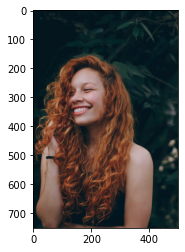

In [25]:
img = matim.imread('./images/Girl.jpg')
plt.imshow(img)

In [26]:
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50, r=0.5):
    edgeImg = cv2.edgePreservingFilter(img,sigma_s=s,sigma_r=r)
    #display output
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)#original image
    plt.imshow(img)
    plt.subplot(1,2,2)#filtered image
    plt.imshow(edgeImg)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [27]:
@widgets.interact(s=(0,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detailImg=cv2.detailEnhance(img,sigma_s=s,sigma_r=r)
    #display output
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)#original image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Original Image')
    plt.subplot(1,2,2)#filtered image
    plt.imshow(detailImg)
    plt.title('Detail Enhance')
    plt.yticks([]),plt.xticks([])
    plt.show()
    



interactive(children=(IntSlider(value=20, description='s', max=200), FloatSlider(value=0.2, description='r', m…

In [28]:
def adjust_gamma(image,gamma=1):
    invGamma=1.0/gamma
    table=np.array([((i/255)**invGamma)*255 for i in np.arange(0,256)]) #lookup table
    lut_img=cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))
    return lut_img

In [29]:
path = './images/Girl.jpg'
img = matim.imread(path)

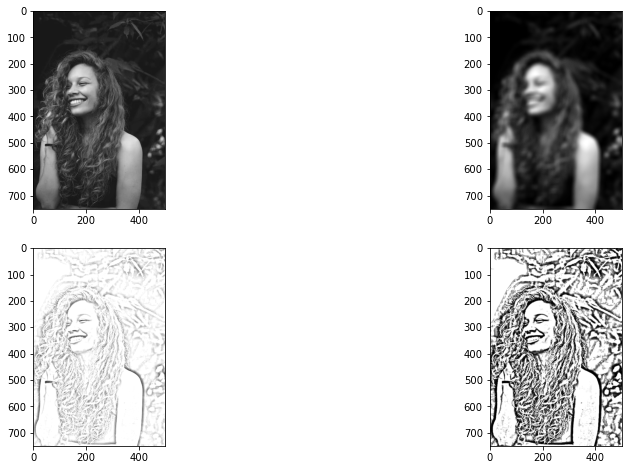

In [30]:
#pencil sketch
ksize=21
sigmaX=9
gamma=0.1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)#ksize=3 to 25 and sigmax = 1to 15
gray_blur_divide= cv2.divide(gray,gray_blur,scale=256)
pencil_sketch = adjust_gamma(gray_blur_divide,gamma=gamma)#0-1

#display output
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(gray_blur,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(gray_blur_divide,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(pencil_sketch,cmap='gray')


In [31]:
@widgets.interact_manual(ksize=(3,25,2),sigmaX=(1,15,2),gamma=(0,1,0.01))
def pencil_art_image(ksize=21,sigmaX=9, gamma=0.1):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)#ksize=3 to 25 and sigmax = 1to 15
    gray_blur_divide= cv2.divide(gray,gray_blur,scale=256)
    pencil_sketch = adjust_gamma(gray_blur_divide,gamma=gamma)
    #display the output  
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)#original image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Original Image')
    plt.subplot(1,2,2)#filtered image
    plt.imshow(pencil_sketch, cmap='gray')
    plt.title('Pencil Sketch')
    plt.yticks([]),plt.xticks([])
    plt.show()




interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…

In [32]:
img= matim.imread('./images/Girl.jpg')

In [33]:
#Edge Mask
def edge_mask(img,ksize,block_size):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_median=cv2.medianBlur(gray,ksize)
    edges=cv2.adaptiveThreshold(gray_median,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,block_size,ksize)
    return edges


In [34]:
edge_img=edge_mask(img,5,9)

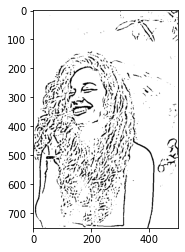

In [35]:
plt.imshow(edge_img,cmap='gray')

In [38]:

#K Means Clustering


In [39]:
def kmeans_cluster(img,k):
    #transform image
    data=np.float32(img).reshape((-1,3))

    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # k means
    ret,label,center=cv2.kmeans(data,k,None,criteria,5,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result



In [40]:
cluster_img=kmeans_cluster(img,6)

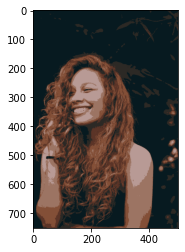

In [41]:
plt.imshow(cluster_img)

In [42]:
#apply bilateral filter
d=7
sigmacolor=200#greater100
sigmaspace=200#greater200
bilateral=cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace=sigmaspace)
cartoon=cv2.bitwise_and(bilateral,bilateral,mask=edge_img)

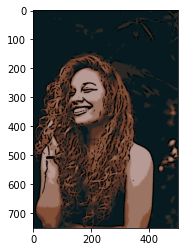

In [43]:
plt.imshow(cartoon)